<a href="https://colab.research.google.com/github/jrakhshanda/Deep-Learning/blob/master/trafficSign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle --upgrade

In [24]:
# Info on how to get your api key (kaggle.json) here: https://github.com/Kaggle/kaggle-api#api-credentials
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
api_token = {"username":"rakhshandajabeen55","key":"2483f350dd73f648b655ddd3456c3ce1"}
import json
import zipfile
import os
!chmod 600 /root
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
!kaggle config path -p /content
!kaggle competitions download -c sweden-traffic-signs-classification
os.chdir('/content/')

mkdir: cannot create directory ‘/root/.kaggle’: File exists
usage: kaggle config [-h] {view,set,unset} ...
kaggle config: error: argument command: invalid choice: 'path' (choose from 'view', 'set', 'unset')
data.zip: Skipping, found more recently modified local copy (use --force to force download)
sample.csv: Skipping, found more recently modified local copy (use --force to force download)
data.rar: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
preprocessed.rar: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [25]:
from zipfile import ZipFile
with ZipFile('/content/data.zip', 'r') as zipObj:
    print(zipObj)
    zipObj.extractall("data")

<zipfile.ZipFile filename='/content/data.zip' mode='r'>


In [86]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf 

from keras.models import Sequential
from keras.layers import  Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPool2D
from keras import backend as K
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator, load_img

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import random
from matplotlib import pyplot as plt
from matplotlib import cm

In [27]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

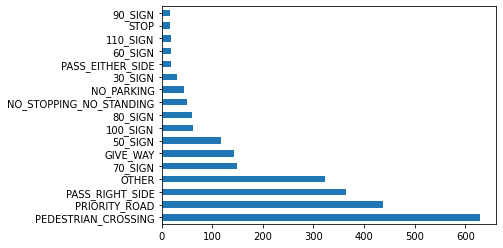

In [28]:
train["label"].value_counts().plot(kind = "barh")

In [29]:
train, validate = train_test_split(train, test_size=0.30, random_state=20)

In [43]:
im_size = (70,70)
b_size = 128
train_datagen = ImageDataGenerator(
    #rotation_range=15,
    rescale=1./255,
    #shear_range=0.1,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #width_shift_range=0.2,
    #height_shift_range=0.2
)
train_generator = train_datagen.flow_from_dataframe(
    train, 
    "/content/data/data", 
    x_col='file_name',
    y_col='label',
    target_size=im_size,
    class_mode='categorical',
    batch_size=b_size
)

Found 1752 validated image filenames belonging to 17 classes.


In [44]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate, 
    "/content/data/data/", 
    x_col='file_name',
    y_col='label',
    target_size=im_size,
    class_mode='categorical',
    batch_size=b_size
)

Found 751 validated image filenames belonging to 17 classes.


In [92]:
def createModel( num_classes,image_shape):
  model = Sequential()
  model.add(Conv2D(16,kernel_size=(3,3),activation= "relu",input_shape = image_shape))
  model.add(Conv2D(16,kernel_size=(3,3),activation= "relu"))
  model.add(Dropout(0.2))

  model.add(Conv2D(32,kernel_size=(3,3),activation= "relu"))
  model.add(Conv2D(32,kernel_size=(3,3),activation= "relu"))
  model.add(Dropout(0.2))

  model.add(Conv2D(64,kernel_size=(3,3),activation= "relu"))
  model.add(Conv2D(64,kernel_size=(3,3),activation= "relu"))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(64,activation= 'relu'))
  model.add(Dense(128,activation= 'relu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.RMSprop(learning_rate= 0.001),metrics = ['accuracy'])

  return model
batch_size = b_size
num_classes = 17
image_shape = (70,70,3)
model = createModel(num_classes,image_shape)

In [93]:
#keras.utils.plot_model(model,show_shapes= True,show_layer_names=True)

In [94]:
earlyStop = EarlyStopping(patience = 10)
variable_gradient = ReduceLROnPlateau(monitor='val_accuracy', patience=2, factor=0.5, min_lr=0.001)

In [95]:
epochs = 30
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[earlyStop,variable_gradient]
)

Epoch 1/30
14/14 [==============================] - 1s 81ms/step - loss: 2.9561 - accuracy: 0.2061 - val_loss: 2.5020 - val_accuracy: 0.2663
Epoch 2/30
14/14 [==============================] - 1s 70ms/step - loss: 1.8583 - accuracy: 0.4298 - val_loss: 1.4598 - val_accuracy: 0.6405
Epoch 3/30
14/14 [==============================] - 1s 69ms/step - loss: 1.3561 - accuracy: 0.5930 - val_loss: 0.9432 - val_accuracy: 0.7017
Epoch 4/30
14/14 [==============================] - 1s 68ms/step - loss: 1.0355 - accuracy: 0.6918 - val_loss: 0.9918 - val_accuracy: 0.7497
Epoch 5/30
14/14 [==============================] - 1s 68ms/step - loss: 0.9670 - accuracy: 0.7175 - val_loss: 0.7510 - val_accuracy: 0.7816
Epoch 6/30
14/14 [==============================] - 1s 68ms/step - loss: 0.7856 - accuracy: 0.7534 - val_loss: 0.6723 - val_accuracy: 0.7949
Epoch 7/30
14/14 [==============================] - 1s 69ms/step - loss: 0.8760 - accuracy: 0.7466 - val_loss: 0.6808 - val_accuracy: 0.8083
Epoch 8/30
14

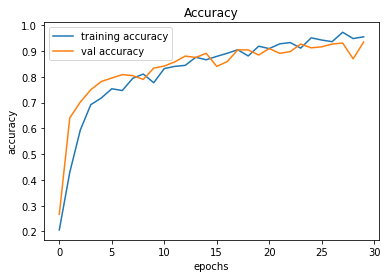

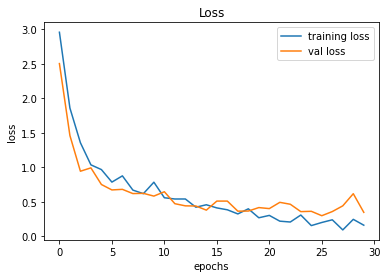

In [96]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [97]:
validation_generator.reset()
predIdxs = model.predict_generator(validation_generator)
predIdxsClasses = np.argmax(predIdxs, axis=1)
print(classification_report(validation_generator.classes, predIdxsClasses,
    target_names=validation_generator.class_indices))

                         precision    recall  f1-score   support

               100_SIGN       0.00      0.00      0.00        20
               110_SIGN       0.00      0.00      0.00         4
                30_SIGN       0.00      0.00      0.00        13
                50_SIGN       0.08      0.08      0.08        37
                60_SIGN       0.00      0.00      0.00         2
                70_SIGN       0.12      0.14      0.13        50
                80_SIGN       0.00      0.00      0.00        24
                90_SIGN       0.00      0.00      0.00         3
               GIVE_WAY       0.02      0.02      0.02        44
             NO_PARKING       0.07      0.07      0.07        14
NO_STOPPING_NO_STANDING       0.00      0.00      0.00        17
                  OTHER       0.18      0.19      0.18        96
       PASS_EITHER_SIDE       0.00      0.00      0.00         6
        PASS_RIGHT_SIDE       0.13      0.12      0.13       113
    PEDESTRIAN_CROSSING 

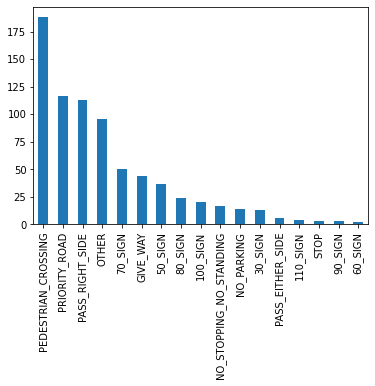

In [98]:
validate["label"].value_counts().plot(kind = "bar")

In [ ]:
test.head()

,file_name
0,picture-176290.jpg
1,picture-834444.jpg
2,picture-768882.jpg
3,picture-212331.jpg
4,picture-277367.jpg


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test, 
    "/content/data/data/", 
    x_col='file_name',
    y_col=None,
    target_size=(70,70),
    class_mode=None,
    batch_size=32
)

Found 610 validated image filenames.


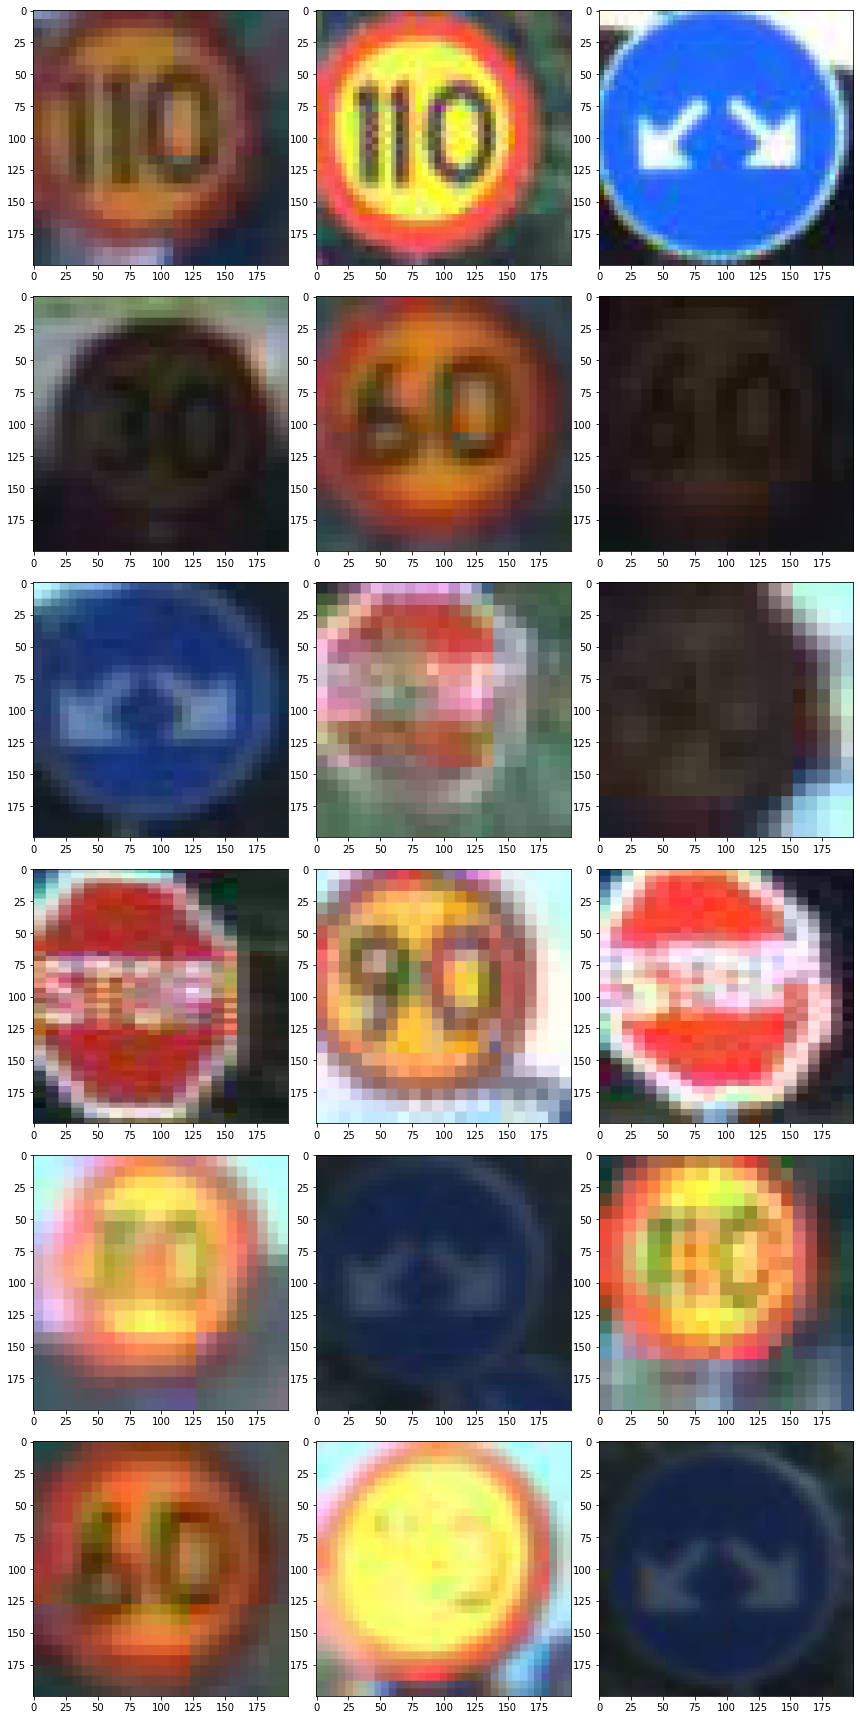

In [ ]:
sample_test = test.head(18)
sample_test.head()
pyplot.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['file_name']
    img = load_img("/content/data/data/"+filename, target_size=(200,200))
    pyplot.subplot(6, 3, index+1)
    pyplot.imshow(img)
pyplot.tight_layout()
pyplot.show()